In [8]:
from common import *

'3.5.3'

In [15]:
# Load dataset
new_arch = pd.read_csv(ROC_PATH / 'DeepCoFFEA' / 'subsampled_ROC_exp01_shape_newarch_500.txt',
                       sep=' ', names=['TPR', 'FPR'])
new_arch['Input representation'] = 'Flows (matching)'

old_arch = pd.read_csv(ROC_PATH / 'DeepCoFFEA' / 'subsampled_ROC_exp01_oldarch_first-window.txt',
                       sep=' ', names=['TPR', 'FPR'])
old_arch['Input representation'] = 'Traces (correlation)'

data = pd.concat((new_arch, old_arch)).reset_index(drop=True)

,TPR,FPR,Input representation
0,1.0,0.999619,Flows (matching)
1,1.0,0.970851,Flows (matching)
2,1.0,0.942910,Flows (matching)
3,1.0,0.915774,Flows (matching)
4,1.0,0.889418,Flows (matching)
...,...,...,...
1495,0.0,0.000000,Traces (correlation)
1496,0.0,0.000000,Traces (correlation)
1497,0.0,0.000000,Traces (correlation)
1498,0.0,0.000000,Traces (correlation)


The first window of exp1 in the old architecture has in average 500 packets.

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `old_vs_new_arch-crop.pdf'.


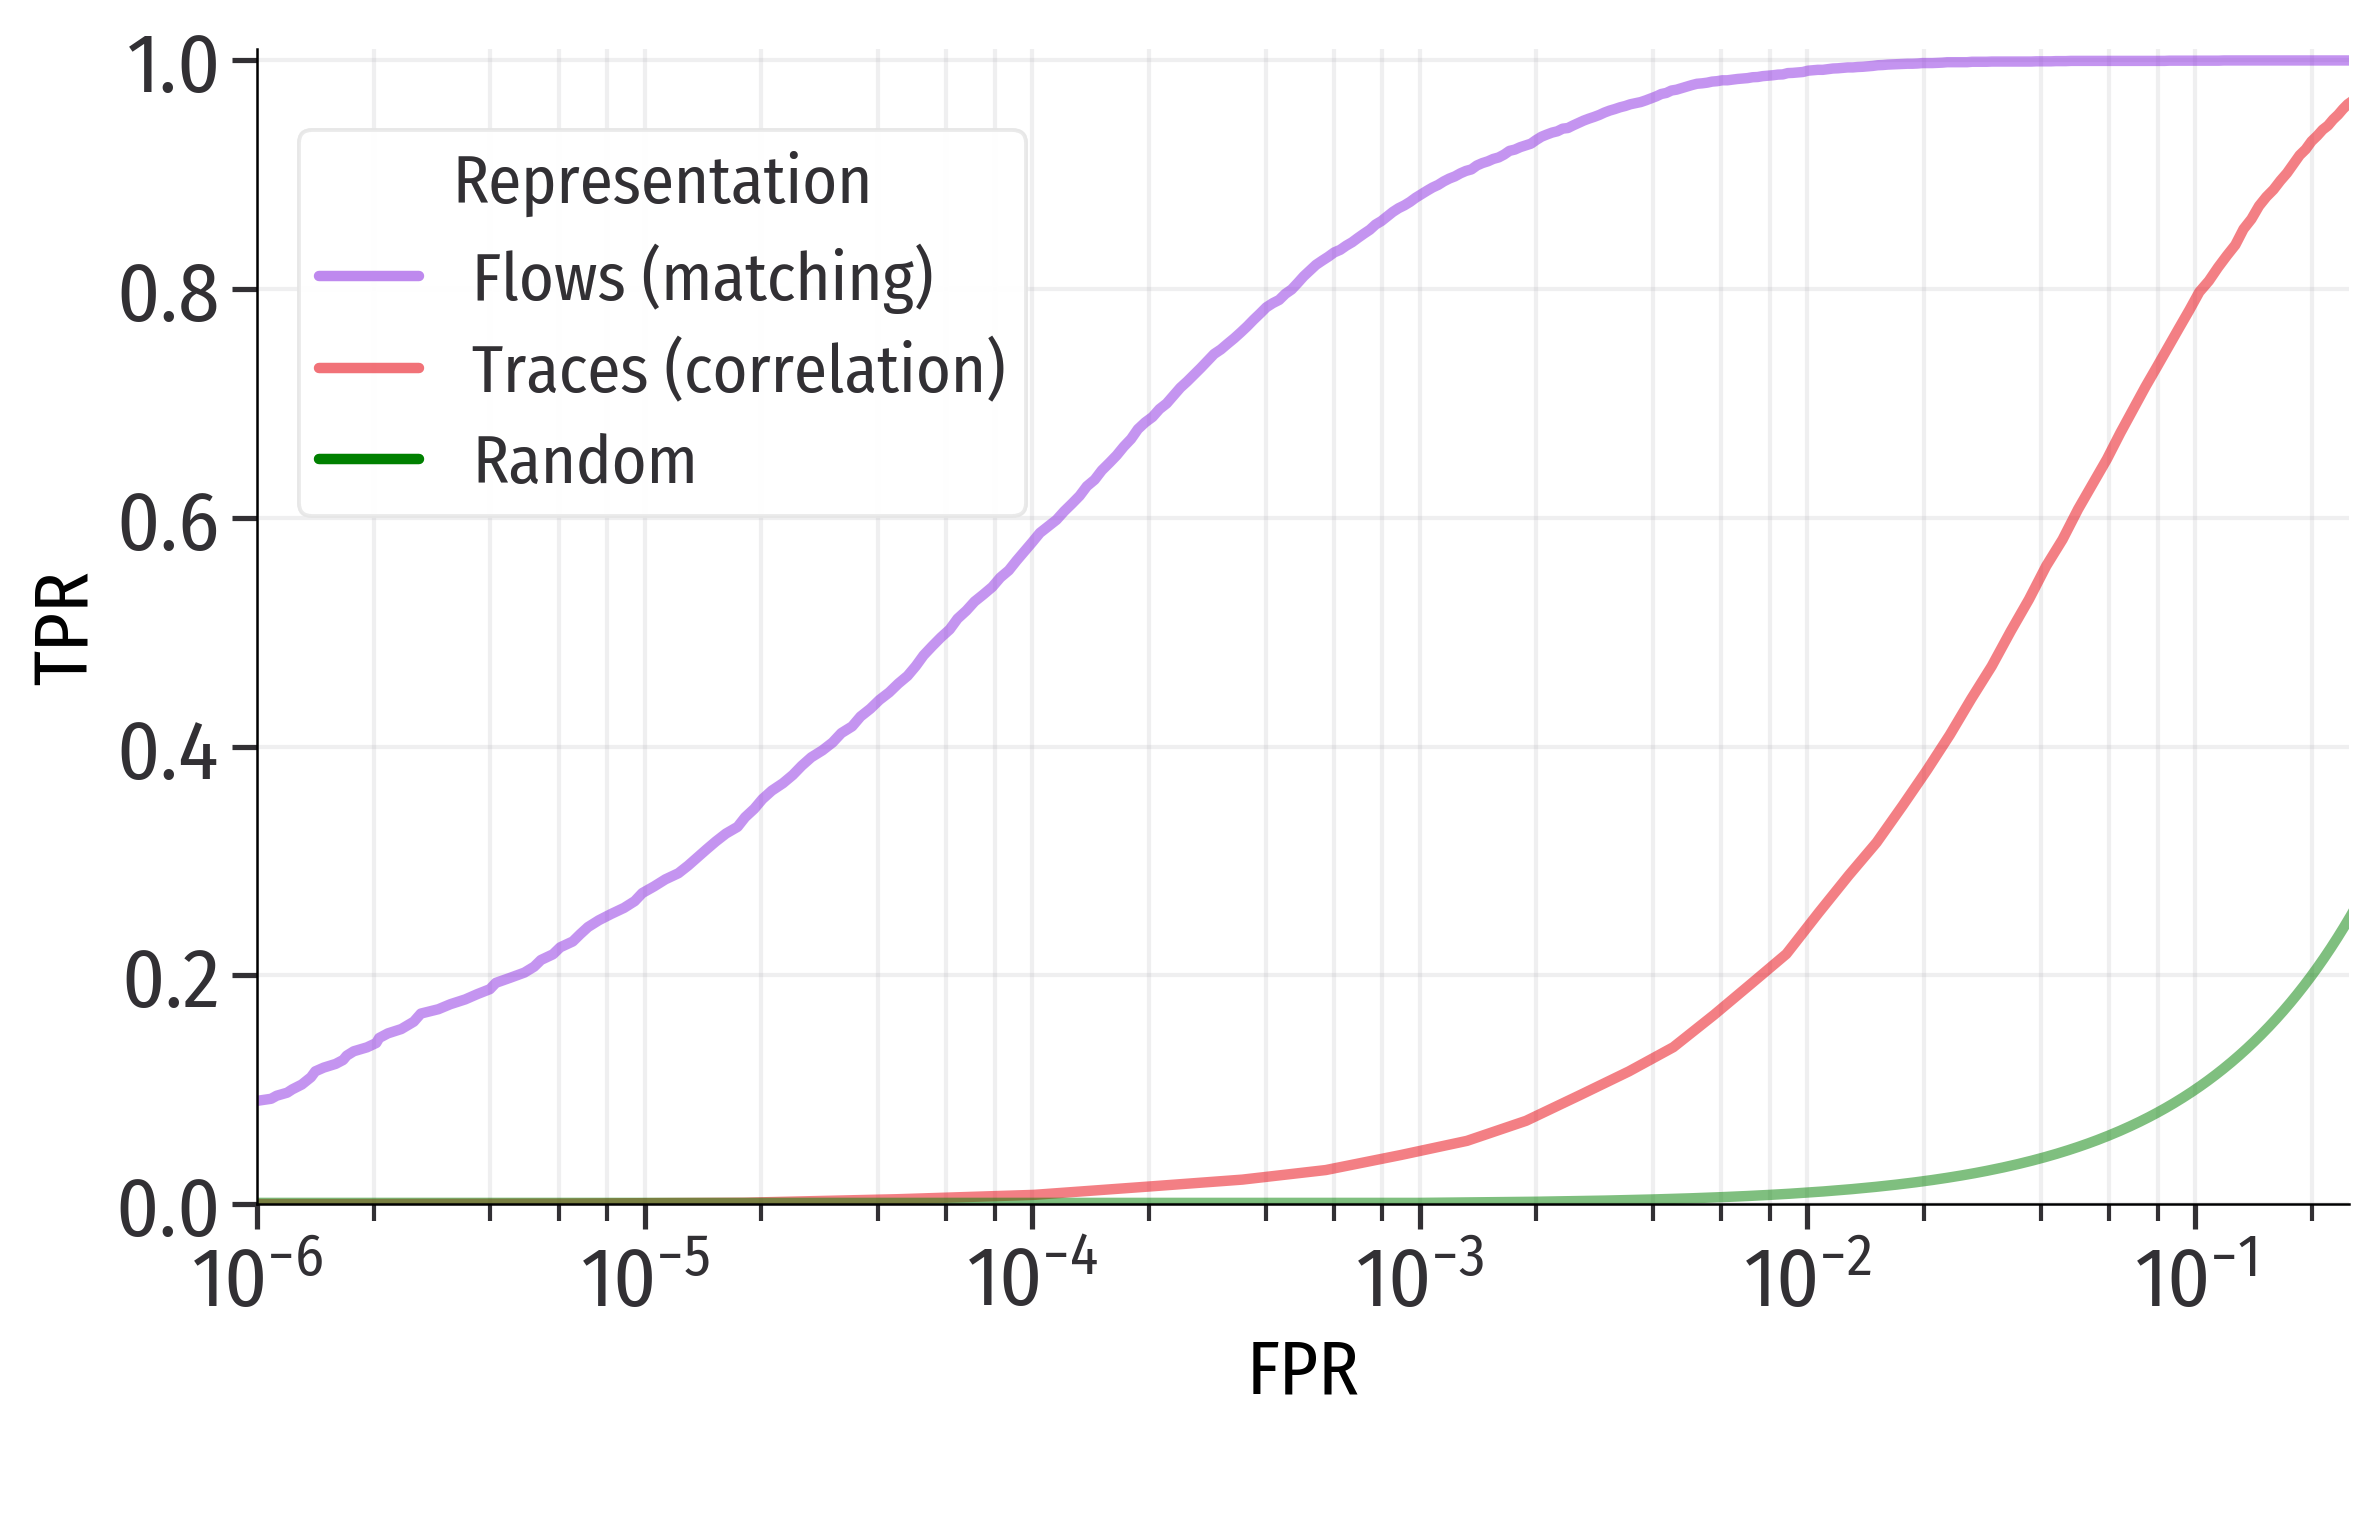

In [16]:
fig = plt.gcf()
fig.set_size_inches(SIZE_W, SIZE_H)

g = sns.lineplot(data=data, x='FPR', y='TPR', dashes=False, hue='Input representation', legend='full', ci=None, palette=[purple, red])

plot_random_classifier(g)
set_log_scale(g)

# format legends
handles, labels = g.get_legend_handles_labels()
handles.insert(3, random_line)
labels.insert(3, 'Random')
windows_leg = plt.legend(title='Representation',
                         handles=handles,
                         labels=labels,
                         bbox_to_anchor=(0.02, 0.93),
                         loc='upper left',
                         borderaxespad=0,
                         borderpad=0.3,
                         handlelength=1.5,
                         ncol=1)
g.add_artist(windows_leg)

save_fig('comp_exp1_vs_exp1_old-arch')